In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


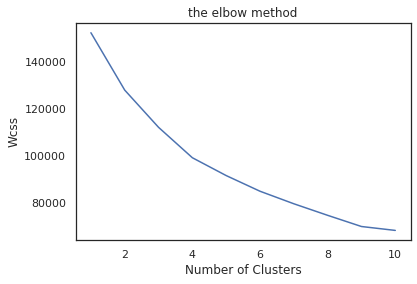

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
x = pd.read_csv('drive/My Drive/ICP-6/CC.csv',index_col=0)
x=x.apply(lambda x: x.fillna(x.mean()),axis=0)
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)
wcss = []
for i in range(1,11):   
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [26]:
nclusters = 4 # this is the k in kmeans
seed=0
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled) # predict the cluster for each data pointy_cluster_kmeans=km.predict(X_scaler)


# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(score)

0.1976074492720698


In [30]:
import pandas as pd
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.read_csv('drive/My Drive/ICP-6/CC.csv',index_col=0)
x = x.apply(lambda x: x.fillna(x.mean()), axis=0)
scaler.fit(x)
x_scaler= scaler.transform(x)
x_scaled=pd.DataFrame(x_scaler, columns =x.columns)
pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
from sklearn.cluster import KMeans
nclusters = 4 # this is the k in kmeans
seed=0
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(df2) # predict the cluster for each data pointy_cluster_kmeans=km.predict(X_scaler)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(df2)
from sklearn import metrics
score = metrics.silhouette_score(df2, y_cluster_kmeans)
print(score)


0.4076554708119659
